# House Prices - Advanced Regression Techniques (Kaggle)

Run after following notebooks are run:
1. 01 Data Cleaning

#### Development Ideas
* research how to systematically loop through all relationship graphs
* https://medium.com/@sebastiencallebaut/kaggle-housing-competition-learn-with-a-step-by-step-solution-bdca19cc8eed

In [1]:
### set up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

pd.options.display.max_rows = 100

## Load Data

In [2]:
### load data (cleaned)
train = pd.read_csv('train_clean.csv')

### convert all object datatypes to category
for col in train.select_dtypes(include='object'):
    train[col] = train[col].astype('category')

### convert additional columns to category datatype
train['MSSubClass'] = train['MSSubClass'].astype('category')

## Univariate (One-way) Analysis

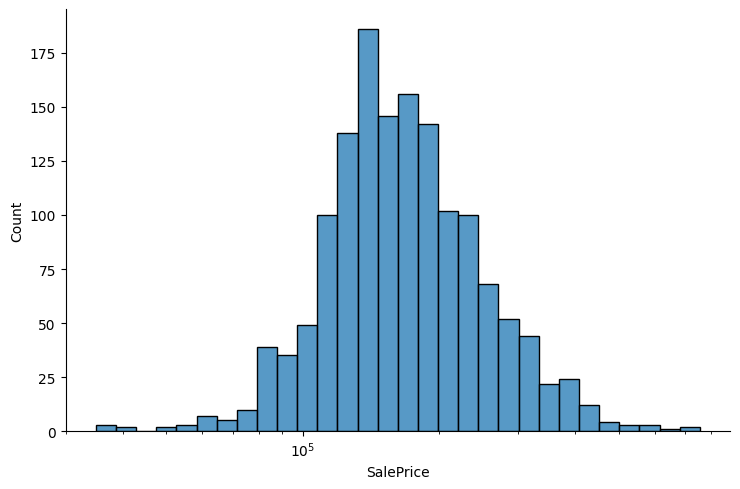

In [3]:
### histogram of sale price
g=sns.displot(data=train, x='SalePrice', bins=30, log_scale=True, aspect=1.5)

### Categorical Variables

Observations
* Variables that are 0 for almost all houses - hence can be dropped
    * 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature', 
* categorical variables that didn't seem predictive (at least not on its own):
    * 'Alley','LandSlope', 'Condition1', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'HeatingQC', 'Functional', 'remodel_flag'

Ideas for feature engineerings
* overall quality - group <4
* house style - create column for unfinished vs finished
* SaleType - new or old

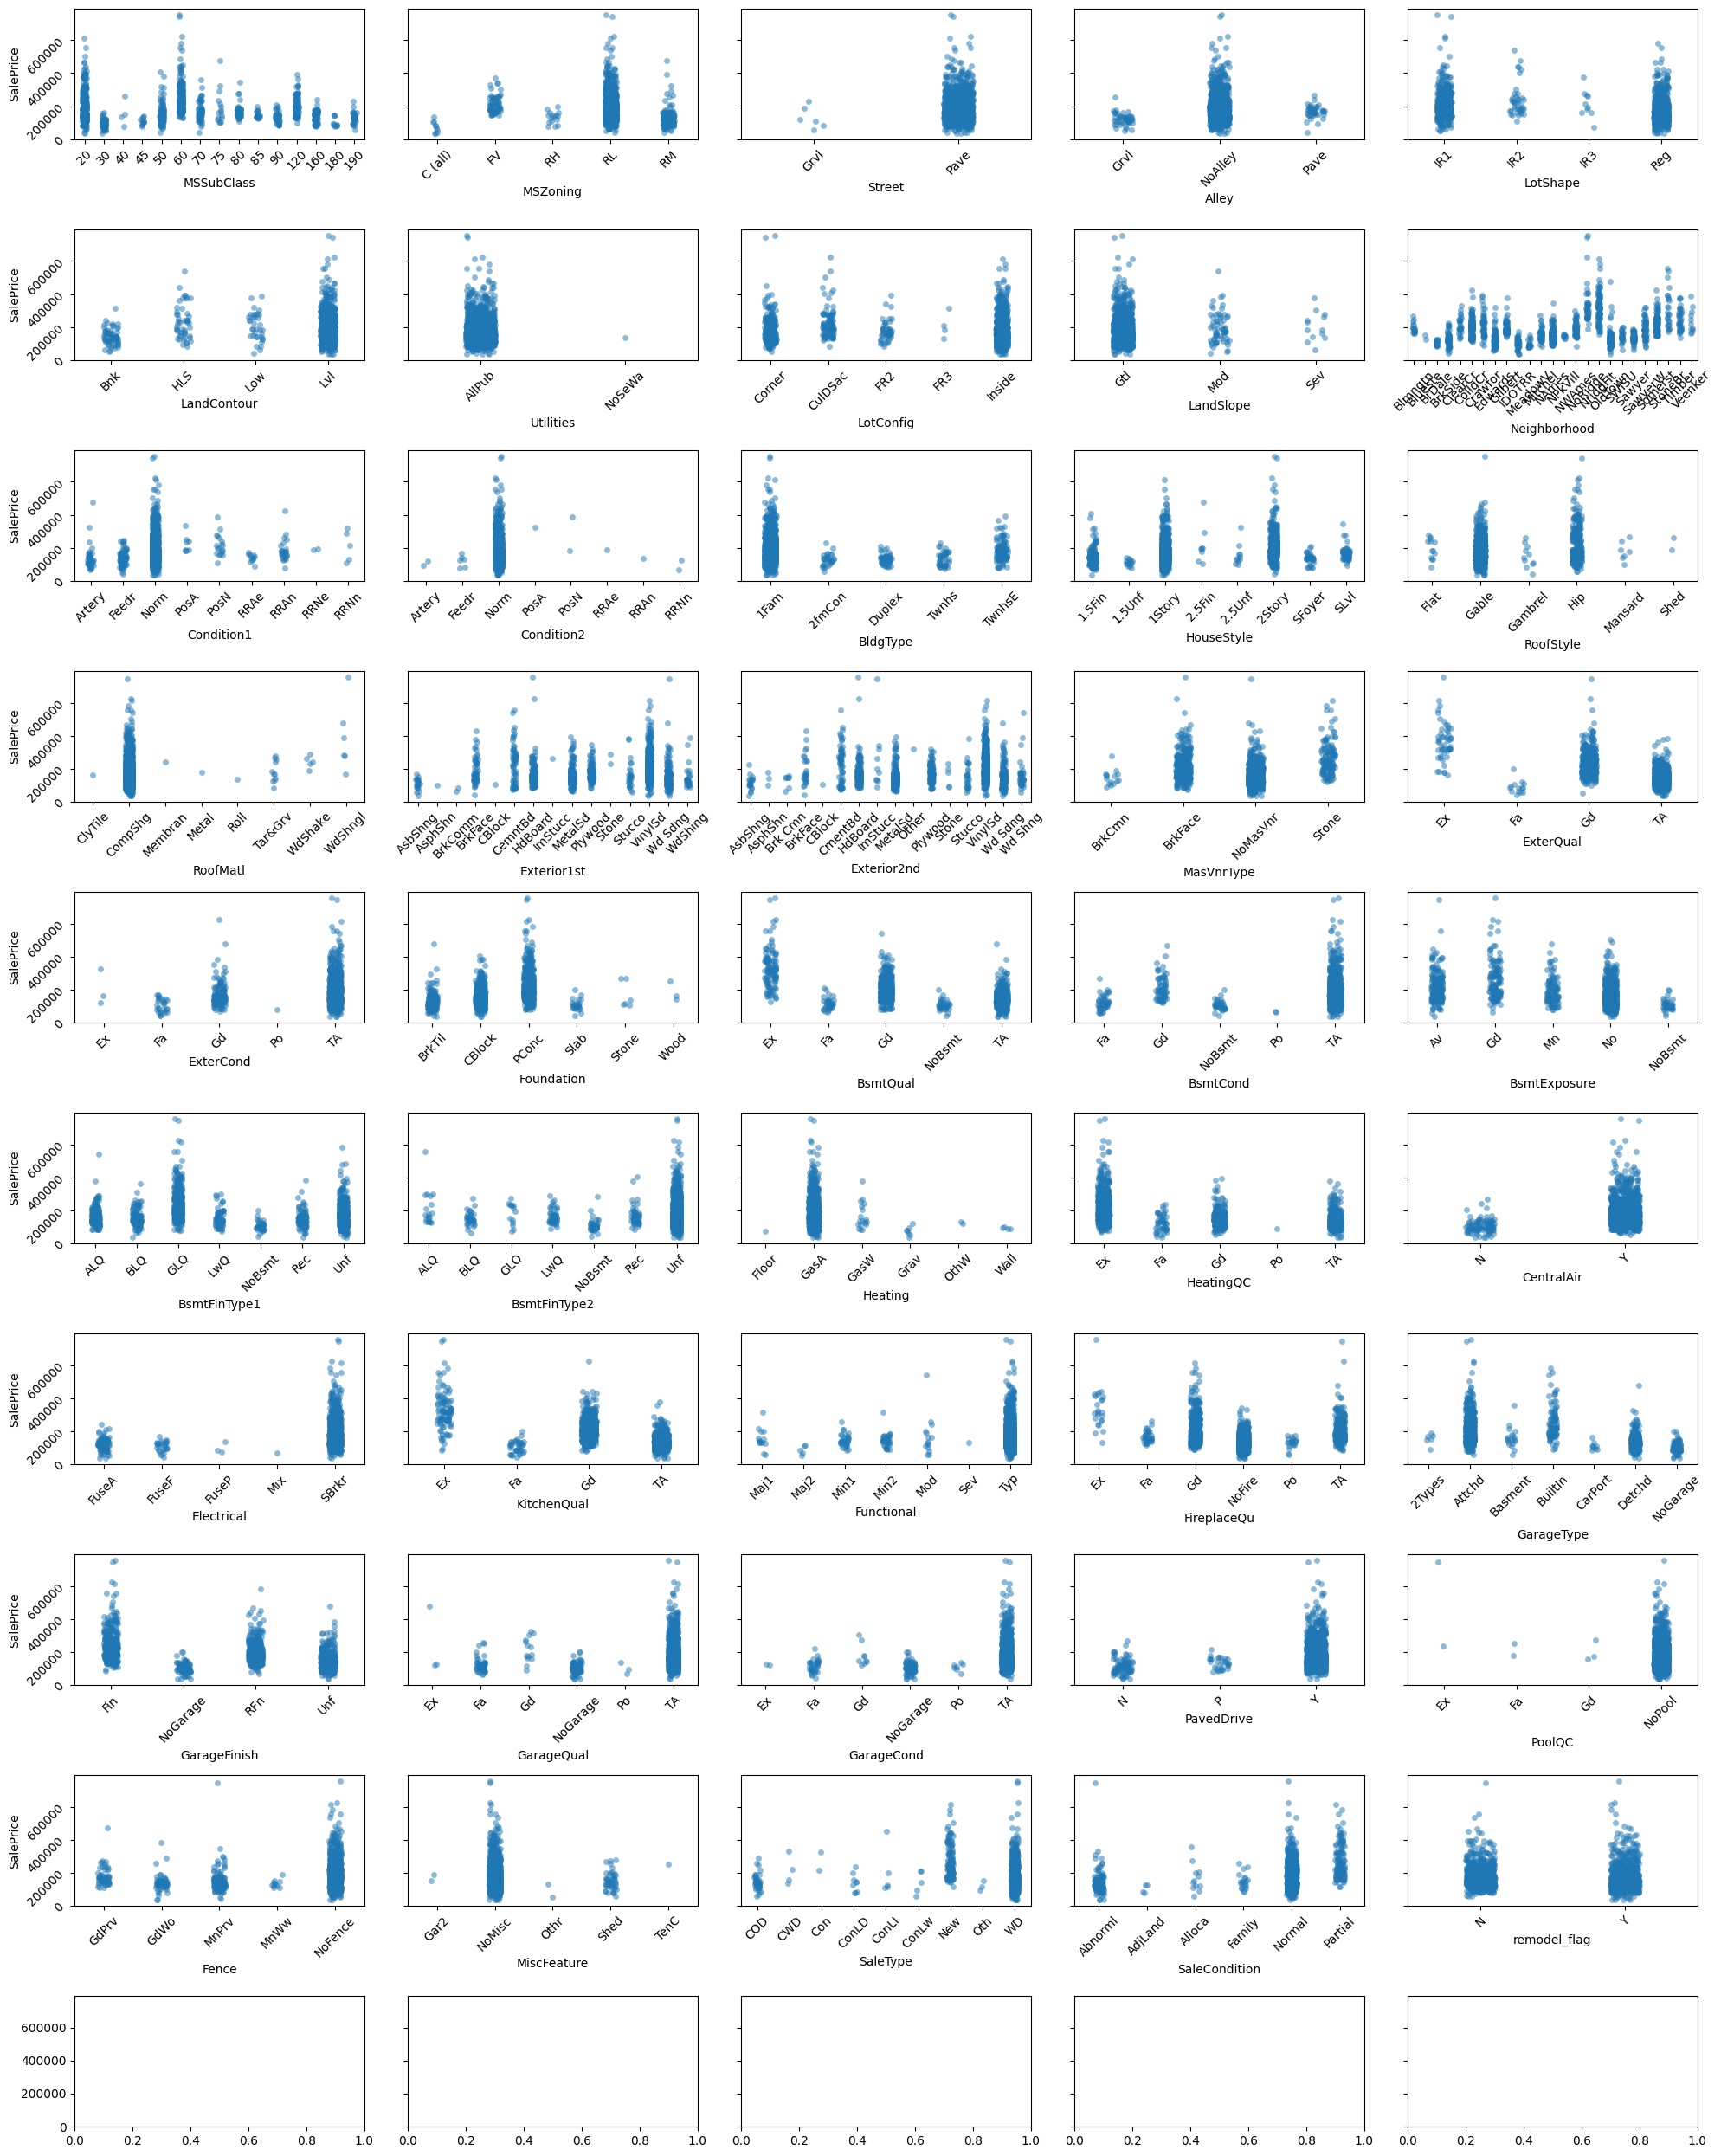

In [19]:
### list of all categorical variables
cols_cat = train.select_dtypes(include='category').columns.to_list()

### set up grid of subplots, then fill it with scatterplots of each categorical variable vs SalePrice
fig, axes = plt.subplots(ncols=5, nrows=10, figsize=(20,25), sharey=True)
for i, col in enumerate(cols_cat):
    ax = axes.ravel()[i]
    sns.stripplot(data=train, x=col, y='SalePrice', ax=ax, alpha=0.5)
    ax.tick_params(labelrotation=45)
plt.tight_layout()

### Numerical Variables

Observations
* Variables that are 0 for almost all houses - hence can be dropped
    * 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
* More houses are sold in the warmer months
* Variables with outliers - may need to exclude
    * 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'
* Very few houses have more than one half bath - can combined full and half bath columns
* Most of the continuous variables are right skewed

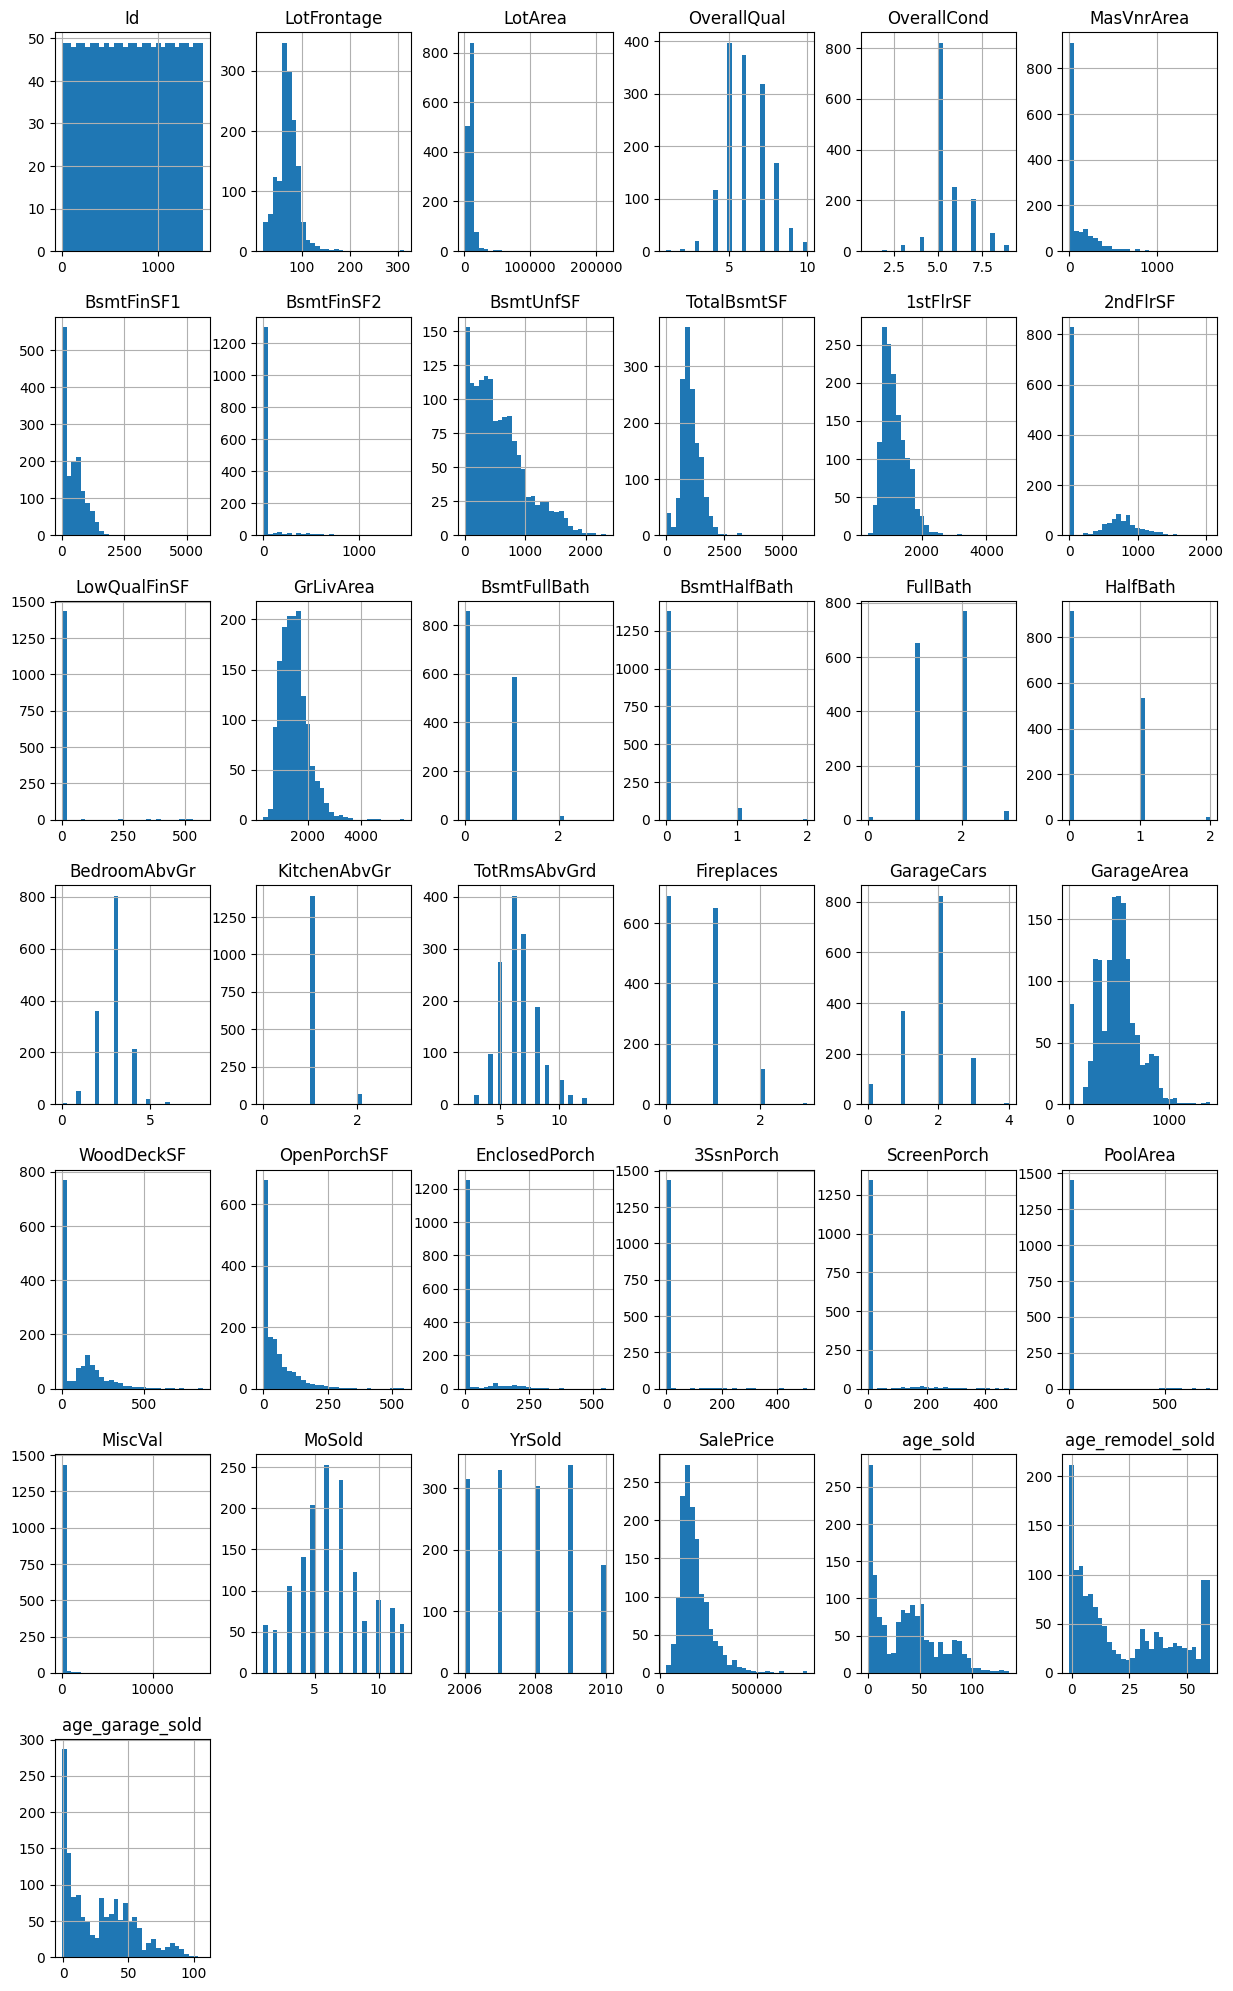

In [15]:
### Histograms of all numerical variables
train.hist(bins=30, figsize=(15,25), layout=(-1,6))
None

In [19]:
### drop variables that are 0 for almost all houses
train.drop(['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], 
            axis=1, inplace=True)

#### Seasonality

[None]

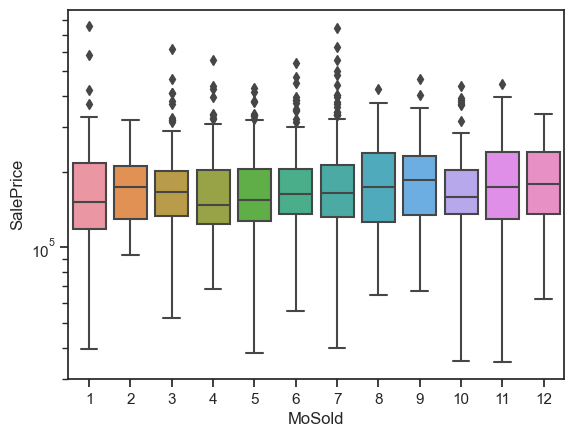

In [47]:
### seasonality?
g=sns.boxplot(data=train, x='MoSold', y='SalePrice')
g.set(yscale='log')

C:\Users\steph\AppData\Local\Temp\ipykernel_20060\3813692613.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


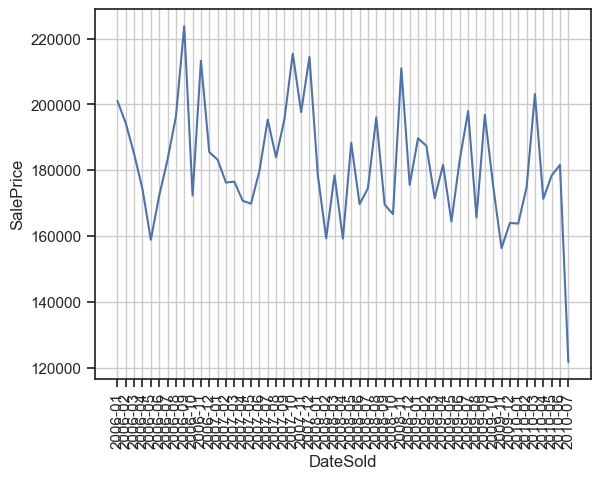

In [62]:
### seasonality?
train['DateSold'] = train['YrSold'].astype(str) + '-' + train['MoSold'].astype(str).str.zfill(2)
datesold_mean = train.groupby('DateSold').SalePrice.mean().to_frame()

g=sns.lineplot(data=datesold_mean, x='DateSold', y='SalePrice')
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.grid()
None

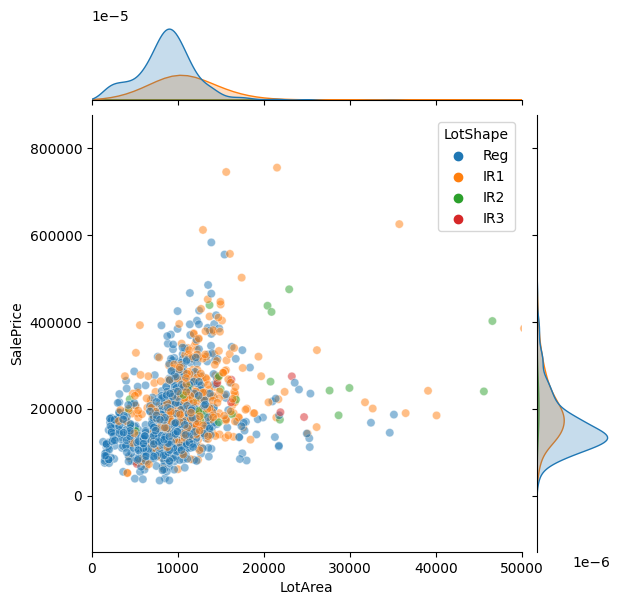

In [28]:
### multivariate views
g=sns.jointplot(data=train,x='LotArea',y='SalePrice',hue='LotShape',xlim=(0,50000),alpha=0.5)

In [5]:
## correlation plots between continuous
## kramers v for relationship between categorical

